# UCI-SECOM : Logistic Regression Code
📌 목적 : 데이터 전처리, 스케일링, 교차 검증, 평가는 동일한 방식으로 진행하고 모델링에 따라 어떠한 차이점이 있는지 확인

### 데이터 분석 과정
- 데이터 전처리 : Null 값이 900개 넘는 칼럼 삭제하고 남는 NaN값은 0으로 대체
- 스케일링: StandardScaler, PCA
- 모델링 : Logistic Regression
- 교차 검증 : cross_val_score
- 평가 : confusion matrix, accuracy score, recall score, F1_score, RMSE

## 1. 라이브러리 import

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")

## 2. 데이터 로딩

In [2]:
dataset = pd.read_csv("uci-secom.csv")

In [3]:
dataset.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
dataset.isnull().any().any()

True

## 3. 결측값 처리
- 결측값의 수 합산
- 새로운 j 배열에 결측값의 수가 900개가 넘는 경우 저장
- dataset에서 j column 삭제
- 나머지 column의 결측값은 0으로 대체

### 3.1 Null값 수 합산

In [5]:
d = dataset.isnull().sum()

### 3.2 Null 값이 900개가 넘는 경우 j 배열에 저장

In [6]:
j = []

In [7]:
for i in d.keys():
    if(d[i]>900):
        print(i,d[i])
        j.append(i)

85 1341
109 1018
110 1018
111 1018
157 1429
158 1429
220 1341
244 1018
245 1018
246 1018
292 1429
293 1429
358 1341
382 1018
383 1018
384 1018
492 1341
516 1018
517 1018
518 1018
578 949
579 949
580 949
581 949


### 3.3 j 칼럼 삭제

In [8]:
dataset.drop(j, axis=1, inplace=True)
dataset

,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


### 3.4 나머지 칼럼의 결측값은 0으로 대체

In [9]:
dataset.replace(np.nan, 0, inplace=True)
dataset

,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,0.0000,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [10]:
dataset.isnull().any().any()

False

## 4. 데이터 분리

### 4.1 Pass/Fail 칼럼 분리

In [11]:
X = dataset.drop(['Pass/Fail','Time'],axis=1) 
y = dataset['Pass/Fail']

print("shape of x:", X.shape)
print("shape of y:", y.shape)

shape of x: (1567, 566)
shape of y: (1567,)


In [12]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,576,577,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


### 4.2 학습 데이터, 테스트 데이터 분리

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print("shape of x_train: ", X_train.shape)
print("shape of x_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1253, 566)
shape of x_test:  (314, 566)
shape of y_train:  (1253,)
shape of y_test:  (314,)


## 5. 스케일링
1. StandardScaler
2. PCA

### 5.1 StandardScaler
- 표준화를 쉽게 하기 위해 지원하는 클래스
- 평균이 0이고 분산이 1인 값으로 변환

#### 5.1.1 StandardScaler를 적용하기 전 데이터 평균값과 분산값

In [16]:
print('X_train의 평균값 ')
print(X_train.mean())

print('\nX_train의 분산값')
print(X_train.var())

X_train의 평균값 
0      3003.454286
1      2490.879354
2      2175.840344
3      1375.752093
4         4.867683
          ...     
585       3.101109
586       0.021334
587       0.016397
588       0.005244
589     100.427950
Length: 566, dtype: float64

X_train의 분산값
0       41760.549853
1       21412.792364
2       54409.796824
3      212244.108707
4        3934.607391
           ...      
585        15.745471
586         0.000154
587         0.000075
588         0.000008
589      8939.509587
Length: 566, dtype: float64


#### 5.1.2 StandardScaler 적용

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X = sc.fit_transform(X)

In [19]:
X_pd = pd.DataFrame(X)
X_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,556,557,558,559,560,561,562,563,564,565
0,0.139998,0.429208,0.032735,0.059342,-0.049911,0.094946,-0.228536,0.239971,0.436850,1.128343,...,-0.229797,-0.135520,0.055275,-0.204269,-0.092516,-0.196519,-1.734706,-1.868461,-1.840769,-1.061159
1,0.464020,-0.105874,0.236852,0.173847,-0.059375,0.094946,0.187826,0.278951,0.393723,0.022511,...,-0.263493,-0.460054,0.162312,0.407145,0.445214,0.385516,-0.958144,0.412587,0.251029,1.156951
2,-0.351256,0.407233,0.026413,0.684661,-0.047236,0.094946,-0.415634,0.232175,-0.192349,0.327111,...,-0.205046,-0.590505,-0.304064,0.022827,0.015030,0.030373,2.989383,3.624211,3.318999,-0.178407
3,-0.070903,-0.025985,0.086766,-1.033387,-0.050620,0.094946,0.354494,0.045074,0.300837,-0.765478,...,-0.224950,-0.645708,-0.059408,-0.291614,-0.361381,-0.282803,-0.100689,-0.177535,-0.306784,-0.274469
4,0.146544,0.098340,0.250931,-0.125070,-0.046823,0.094946,0.016475,0.185400,0.465600,-0.149655,...,-0.230791,-0.454486,-1.512057,26.860983,27.062850,26.907579,-0.100689,-0.177535,-0.306784,-0.274469


In [20]:
print('X_train의 평균값 ')
print(X_train.mean())

print('\nX_train의 분산값')
print(X_train.var())

X_train의 평균값 
-2.2818184494226268e-17

X_train의 분산값
0.8021201413427562


### 5.2 PCA(주성분 분석)
- 가장 대표적인 차원 축소 기법
- 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
- 기존 데이터의 정보 유실이 최소화를 목표로 함

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
pca = PCA(n_components=0.85)
X_pca = pca.fit_transform(X)

X_pca_pd = pd.DataFrame(data = X_pca)

In [23]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('\nTotal features:', pca.n_components_)
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.05709479 0.03789838 0.02926733 0.026212   0.0233862  0.02204847
 0.01901021 0.0180492  0.01772505 0.01610313 0.01516086 0.01469317
 0.01441183 0.01372107 0.01361552 0.01341125 0.01299468 0.01256908
 0.01218771 0.01167496 0.0113639  0.01113073 0.01086963 0.01057798
 0.01016699 0.01001149 0.00994223 0.00970551 0.00935605 0.0089403
 0.00874376 0.00862317 0.00825497 0.00808178 0.00793076 0.00782306
 0.00769352 0.00753651 0.00746202 0.00728226 0.00720195 0.00708609
 0.00686254 0.00671258 0.00663692 0.00662037 0.00655481 0.00648975
 0.00625613 0.00607661 0.00598806 0.00594888 0.0058418  0.00576625
 0.00565627 0.00546543 0.0053996  0.00538472 0.00528264 0.00521017
 0.00510636 0.0050399  0.00500063 0.00499131 0.00481333 0.00475621
 0.0046536  0.00465065 0.00451614 0.00449709 0.00434361 0.00431796
 0.00421254 0.00415984 0.00410826 0.00407413 0.00385752 0.00382976
 0.00373831 0.00357884 0.00354508 0.003491   0.00340439 0.00335632
 0.00329752 0.00320668 0.00311863 0

In [24]:
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)

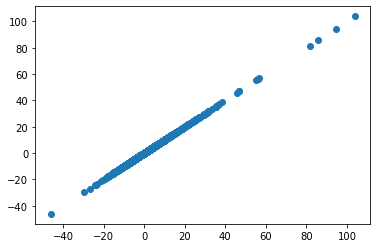

In [25]:
plt.scatter(X_pca[:,1:-1], X_pca[:,1:-1])

## 6. 로지스틱 회귀 모델 수행

### 6.1 print_score 함수 정의
- cross_val_score() 이용하여 교차 검증 수행

In [26]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [27]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

### 6.2 로지스틱 회귀 모델 적용

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
classifier = LogisticRegression(random_state=50)
classifier.fit(X_train, y_train) 

LogisticRegression(random_state=50)

In [30]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8822

Classification Report:
              precision    recall  f1-score   support

          -1       0.93      0.94      0.94       290
           1       0.22      0.21      0.21        24

    accuracy                           0.88       314
   macro avg       0.58      0.57      0.57       314
weighted avg       0.88      0.88      0.88       314


Confusion Matrix:
[[272  18]
 [ 19   5]]



### 6.3 plot_result 함수 정의 후 로지스틱 회귀 모델 적용

In [31]:
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix

In [32]:
cv_acc = {}

cv_TPR = {}

cv_FPR = {}

In [33]:
def plot_result(model, name:str):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    scoring = ['balanced_accuracy', 'recall_macro']
    scores = cross_val_score(model, X_test, y_test, cv=10, scoring = 'balanced_accuracy')
    
    cv_acc[name] = round(scores.mean(), 4)*100 
    cv_TPR[name] = (confusion_matrix(y_test, y_pred)[1][1]/confusion_matrix(y_test, y_pred)[1].sum())*100  
    cv_FPR[name] = (confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred)[0].sum())*100 
    
    print('Average Balanced Accuracy (CV=10):', scores.mean())

    print(classification_report(y_test, y_pred, zero_division=0))

    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

Average Balanced Accuracy (CV=10): 0.5002873563218391
              precision    recall  f1-score   support

          -1       0.93      0.94      0.94       290
           1       0.22      0.21      0.21        24

    accuracy                           0.88       314
   macro avg       0.58      0.57      0.57       314
weighted avg       0.88      0.88      0.88       314



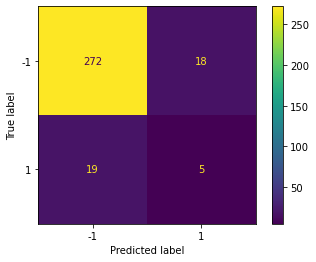

In [34]:
plot_result(classifier, "lr")

📍 로지스틱 회귀를 정의한 함수 2개의 정확도 값이 다름... 그 부분에 대해서는 이유를 알아봐야할듯..